# **< 닮은 연예인 찾기 프로젝트 >**

### Step 1. 사진 모으기 및 확인

- 남자 연예인 이미지 개수(내 사진 2장 포함) : 274
 
- file_list: ['조우진.jpg', '이수혁.jpg', '개리.jpeg', '차승원.jpg', '김연우.jpeg', '이안 굿펠로우.jpg', '이승철.jpeg', '산들.jpeg', '김광현.jpg', '클린트 이스트우드.jpg', '이연걸.jpeg', '이상이.jpg', '이승기.jpg', '정국.jpeg', '류현진.jpg', '이용진.jpg', '벤 에플렉.jpeg', '온앤오프와이엇.jpg', '소지섭.png', '정수빈.jpg', '권현빈.jpg', '박명수.jpg', '도상우.jpg', '황정민.jpg', '심수창.jpeg', '옥냥이.jpeg', '씨잼.jpg', '안성기.webp', '잇섭.png', '정형돈.jpg', '이천수.jpg', '정경호.jpg', '하정우.png', '이시언.jpg', '디오.jpeg', '이무진.jpg', '백윤식.png', '로다주.jpeg', '유연석.jpg', '리암 니슨.png', '시우민.jpg', '홍구.jpg', '김상호.png', '유민상.jpeg', '켄 정.jpeg', '정우성.jpeg', '온앤오프라운.jpg', '손호준.jpeg', '김준현.jpg', '박효신.jpg', '임창정.jpg', '차은우.jpeg', '아놀드 슈워제네거.jpg', '박희순.jpg', '주호민.jpeg', '김대중.jpg', '찬열.jpeg', '최양락.jpg', 'b1a4진영.jpeg', '안보현.jpg', '잭 블랙.jpeg', '지코.jpg', '김종국.jpg', '다니엘 크레이그.jpeg', '진.jpeg', '개코.jpeg', '이동국.jpeg', '서장훈.jpg', '강성훈.png', '박선호.jpg', '김래원.jpeg', '한석규.jpeg', '세훈.jpg', '딕헌터.jpeg', '김범수.jpg', '나훈아.jpg', '조달환.png', '류준열.jpg', '이제훈.jpeg', '민경훈.png', '주진모(올드).jpg', '남궁

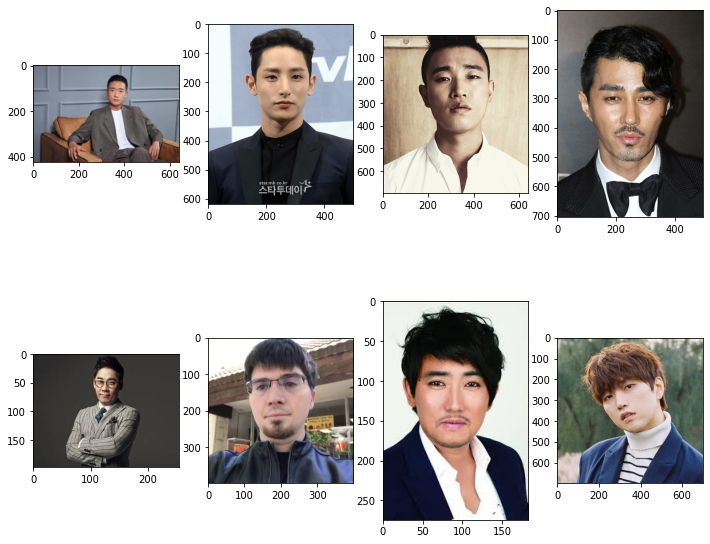

In [55]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/male_celebrity'
file_list = os.listdir(dir_path)

print(f"- 남자 연예인 이미지 개수(내 사진 2장 포함) : {len(file_list)}")
print(' ')
print ("- file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#figsize, subplots의 행과 열을 결정
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,10))

# 쉽게 반복하여 이미지를 보여줄 수 있도로고 축을 배열을 평면화
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)

plt.show()

fig.tight_layout()

### Step 2. 얼굴 영역 자르기

**2-1 얼굴 영역을 구하는 함수 만들기**

In [15]:
# face_recognition의 face_locations을 이용하여 얼굴 영역 검출 함수 만들기

import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

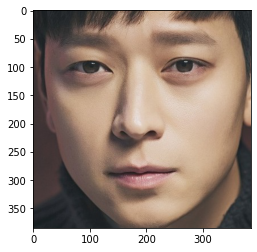

In [16]:
# 만든 함수 테스트

image_path = os.getenv('HOME')+'/aiffel/face_embedding/male_celebrity/강동원.jpeg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

### Step 3. 얼굴 영역의 임베딩 추출하기

**3-1 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수 만들기**

In [17]:
# face_recognition의 face_encodings을 이용하여 얼굴 임베딩 벡터 구하는 함수 만들기

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [18]:
# 만든 함수 테스트

image_file = os.path.join(dir_path, '강동원.jpeg')
face = get_cropped_face(image_file)

embedding = get_face_embedding(face)  
embedding

[array([-0.00690184,  0.04939274, -0.00133496, -0.0084422 , -0.09486277,
        -0.00532311, -0.09571813, -0.1322743 ,  0.11773562, -0.08829834,
         0.16072279,  0.00190156, -0.17210869, -0.12508479, -0.04725311,
         0.13524264, -0.11890574, -0.21128367, -0.00459606, -0.01464938,
         0.10268506,  0.04907204,  0.01384678,  0.03421865, -0.11304501,
        -0.27768904, -0.08842113, -0.13692099,  0.03363752, -0.05643328,
        -0.08157579,  0.04582742, -0.17727928, -0.00476818,  0.10987867,
         0.12726767,  0.02592058, -0.00168644,  0.19155273,  0.03492683,
        -0.20628861,  0.06190561,  0.07661264,  0.23994321,  0.21038774,
         0.05705408,  0.0027594 , -0.12746291,  0.15736511, -0.11131375,
         0.12457728,  0.17161068,  0.19649363,  0.06977534,  0.04474574,
        -0.1453028 ,  0.06345716,  0.04205336, -0.18744396,  0.03306019,
         0.12286402, -0.04866879, -0.03733824, -0.06190582,  0.21348892,
         0.01181681, -0.09939563, -0.23960903,  0.1

**3-2 디렉토리 안에 있는 모든 이미지 파일의 얼굴 임베딩을 구하는 함수 만들기**

In [19]:
# for, try, except으로 예외처리 반복문 함수 만들기

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {} #임베딩 결과를 담기 위해 딕셔너리 생성
    cropped_face_dict = {} #추후에 검출한 얼굴 사진을 보여주기 위해 딕셔너리 생성
    
    for file in file_list:
        try:
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  #임베딩이 성공하면 임베딩 길이가 0보다 클것이다.                     
                 embedding_dict[os.path.splitext(file)[0]] = embedding[0] #이미지파일명에서 확장자를 제거하고 딕셔너리에 담는다.
                 cropped_face_dict[os.path.splitext(file)[0]] = face  #임베딩에 성공한 얼굴사진도 딕셔너리에 담아둔다.
        except: #임베딩이 실패하면 임베딩 길이가 0이고 이때는 예외처리한다.
            continue
            
    return embedding_dict, cropped_face_dict

In [20]:
# 만든 함수 테스트

embedding_dict, cropped_face_dict = get_face_embedding_dict(dir_path)

print(f"임베딩 된 이미지 개수: {len(embedding_dict)}")

embedding_dict['my1'] # 내 사진의 임베딩을 출력하는 것으로 임베딩이 잘 되었는 확인

임베딩 된 이미지 개수: 264


array([-0.05170907,  0.07738636, -0.00403958, -0.06925801, -0.04000138,
       -0.04599436, -0.07619861, -0.12802224,  0.09784981, -0.10683975,
        0.2176796 , -0.09481184, -0.20873432, -0.11788055, -0.03671176,
        0.1712939 , -0.16234112, -0.09871161, -0.09345028, -0.00228523,
        0.09373299,  0.01856215, -0.01181279,  0.05017424, -0.11445063,
       -0.27302793, -0.11965109, -0.05621061, -0.02952908, -0.0711188 ,
       -0.05776673,  0.00764569, -0.18164784, -0.06958123,  0.0300704 ,
        0.06111375, -0.03235416, -0.09433723,  0.19805987, -0.01307631,
       -0.17656374,  0.0988329 ,  0.07361408,  0.23170075,  0.18106757,
        0.02605362,  0.01617863, -0.17564061,  0.16483757, -0.14483896,
        0.01616303,  0.17147274,  0.0884615 ,  0.09847278, -0.02488021,
       -0.08164063,  0.04845121,  0.11598292, -0.14356127,  0.01192162,
        0.09909552, -0.03462545, -0.07054817, -0.11310028,  0.20688348,
        0.06408213, -0.15126707, -0.20888384,  0.10642098, -0.15

* 총 274개 이미지 중 264개 이미지가 임베딩 성고하고, 10개의 이미지가 임베딩 실패

### Step 4. 나랑 닮은 남자 셀럽은?

**4-1 내 사진들끼리 얼굴 임베딩 벡터 거리 구하기**

In [21]:
# 사진 2개 얼굴 임베딩 벡터 거리를 구하는 함수 만들기

import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [22]:
# 만든 함수 테스트

get_distance('my1', 'my2')

0.30066302147392693

**4-2 연예인 사진과 얼굴 임베딩 벡터 거리 구하기**

In [28]:
# name1과 name2의 거리를 비교하는 함수 만들기(name1은 미리 지정하고, name2는 호출시에 인자로 받음)

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [29]:
# 내 얼굴과 가장 닮은 이미지 5장을 보여주는 함수 만들기

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [30]:
# 만든 함수 테스트 - 내 사진 1과 가장 닮은 연예인은?

get_nearest_face('my1')

순위 1 : 이름(my2), 거리(0.30066302147392693)
순위 2 : 이름(정해인), 거리(0.35160788746771543)
순위 3 : 이름(김선호), 거리(0.3626458764855495)
순위 4 : 이름(박건우), 거리(0.36645922543859566)
순위 5 : 이름(유연석), 거리(0.3733552540310162)


### Step 5. 시각화 시도해 보기

In [66]:
# 얼굴 사진을 보여주는 함수 만들기

def show_nearest_face(name, top=10):
    def get_nearest_face(name, top=10):
        sort_key_func = get_sort_key_func(name)
        sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
        
        for i in range(top+1):
            if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
                continue
            if sorted_faces[i]:
                print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
        
        return sorted_faces

    sorted_faces = get_nearest_face(name, top)
    fig = plt.figure(figsize=(12, 10))

    fig.add_subplot(1, top, 1) # 입력한 이름 사진 출력
    plt.imshow(cropped_face_dict[sorted_faces[0][0]])
    
    for i in range(1, 11): # 1위 부터 5위까지 닮은 사진 출력
        fig.add_subplot(2, top, i + top)
        plt.imshow(cropped_face_dict[sorted_faces[i][0]])

순위 1 : 이름(my2), 거리(0.30066302147392693)
순위 2 : 이름(정해인), 거리(0.35160788746771543)
순위 3 : 이름(김선호), 거리(0.3626458764855495)
순위 4 : 이름(박건우), 거리(0.36645922543859566)
순위 5 : 이름(유연석), 거리(0.3733552540310162)


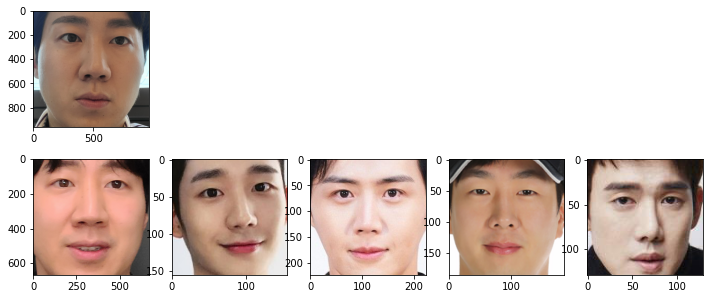

In [53]:
show_nearest_face("my1")

순위 1 : 이름(my1), 거리(0.30066302147392693)
순위 2 : 이름(박건우), 거리(0.3749672394049273)
순위 3 : 이름(안재홍), 거리(0.413083567384053)
순위 4 : 이름(김선호), 거리(0.41429091859648626)
순위 5 : 이름(김래원), 거리(0.41825025441390373)


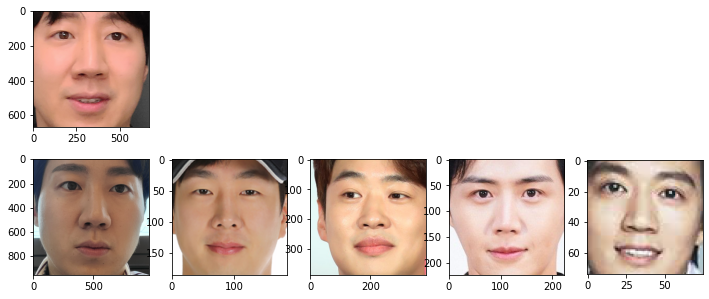

In [54]:
show_nearest_face("my2")

* 내 사진 2장을 약간 분우기가 다른 사진으로 넣어보았는데도 두 사진이 가장 가까운 것으로 잘 계산이 되었다.

* 사진1의 닮은 연예인 4명 중 2명이 사진2에도 있어서 어느 정도 괜찮은 결과가 나온것 같다.

### Step 5. 나랑 닮은 여자 셀럽은?

In [57]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/female_celebrity'
file_list = os.listdir(dir_path)

print(f"- 여자 연예인 이미지 개수(내 사진 2장 포함) : {len(file_list)}")

embedding_dict, cropped_face_dict = get_face_embedding_dict(dir_path)

print(f"임베딩 된 이미지 개수: {len(embedding_dict)}")

- 여자 연예인 이미지 개수(내 사진 2장 포함) : 170
임베딩 된 이미지 개수: 166


순위 1 : 이름(my2), 거리(0.30066302147392693)
순위 2 : 이름(진지희), 거리(0.4030858347627484)
순위 3 : 이름(박나래), 거리(0.4221673982048756)
순위 4 : 이름(허안나), 거리(0.4311660004713583)
순위 5 : 이름(공효진), 거리(0.4338400360012925)


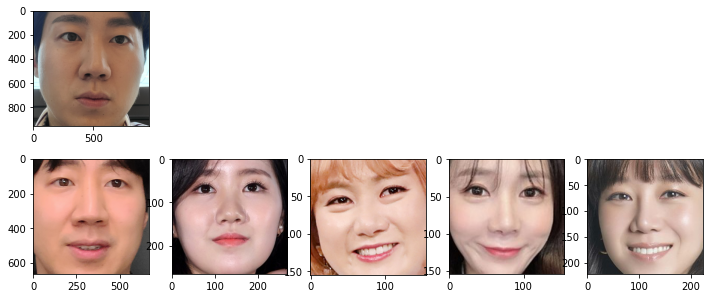

In [58]:
show_nearest_face("my1")

순위 1 : 이름(my1), 거리(0.30066302147392693)
순위 2 : 이름(공효진), 거리(0.4587002095437942)
순위 3 : 이름(진지희), 거리(0.46030038307328724)
순위 4 : 이름(박혜수), 거리(0.4708410413488884)
순위 5 : 이름(장윤정), 거리(0.4779367778413057)


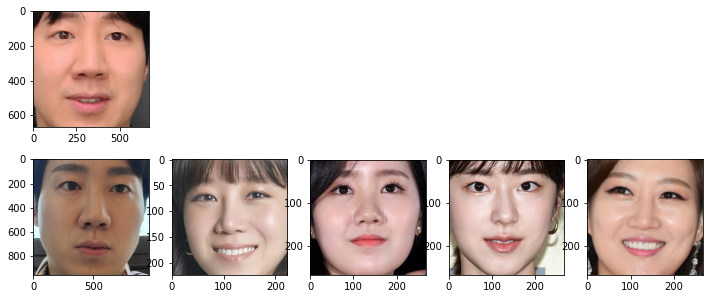

In [59]:
show_nearest_face("my2")

* 진지희 사진이 사진1에도 사진2에도 등장한다..

### Step 6. 모든 연예인과 비교해보자!

In [60]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/all_celebrity'
file_list = os.listdir(dir_path)

print(f"- 모든 셀럽 이미지 개수(내 사진 2장 포함) : {len(file_list)}")

embedding_dict, cropped_face_dict = get_face_embedding_dict(dir_path)

print(f"임베딩 된 이미지 개수: {len(embedding_dict)}")

- 모든 셀럽 이미지 개수(내 사진 2장 포함) : 442
임베딩 된 이미지 개수: 428


순위 1 : 이름(my2), 거리(0.30066302147392693)
순위 2 : 이름(정해인), 거리(0.35160788746771543)
순위 3 : 이름(김선호), 거리(0.3626458764855495)
순위 4 : 이름(박건우), 거리(0.36645922543859566)
순위 5 : 이름(유연석), 거리(0.3733552540310162)
순위 6 : 이름(김광현), 거리(0.37518948843296046)
순위 7 : 이름(조병규), 거리(0.39281130328739333)
순위 8 : 이름(박해수), 거리(0.3999243750099151)
순위 9 : 이름(진지희), 거리(0.4030858347627484)
순위 10 : 이름(이영하), 거리(0.4037276695128935)


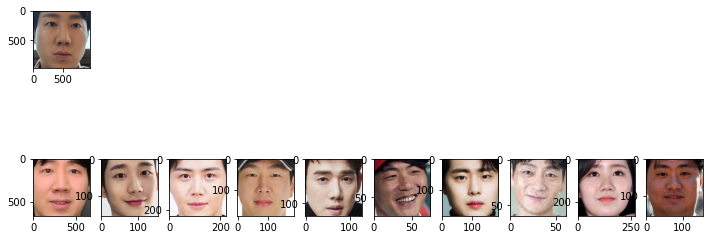

In [67]:
show_nearest_face("my1") # 함수 수정하여 10명까지 출력

순위 1 : 이름(my1), 거리(0.30066302147392693)
순위 2 : 이름(박건우), 거리(0.3749672394049273)
순위 3 : 이름(안재홍), 거리(0.413083567384053)
순위 4 : 이름(김선호), 거리(0.41429091859648626)
순위 5 : 이름(김래원), 거리(0.41825025441390373)
순위 6 : 이름(손흥민), 거리(0.43076209323635006)
순위 7 : 이름(정형돈), 거리(0.4337772043268276)
순위 8 : 이름(노무현), 거리(0.43396935698235745)
순위 9 : 이름(조우진), 거리(0.4345626705608957)
순위 10 : 이름(정해인), 거리(0.43978639772275896)


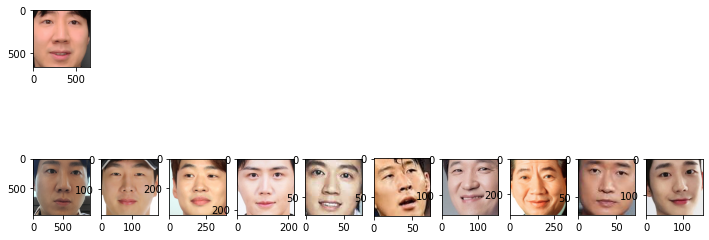

In [68]:
show_nearest_face("my2") # 함수 수정하여 10명까지 출력

* 순위 10위까지 보았을 때, 사진1(my1)에는 9위에 여자 연예인 사진이 나왔다.
* 사진2(my2)에서는 순위10에 여자 셀럽은 없다.

### < 정리 및 회고 >

**1. 데이터 수집 과정의 에피소드**

- 온라인에서 서비스 중인 연예인 닮은 꼴 찾기를 해보니, 남자와 여자를 구분하는 경우들이 있어 남자 연예인 사진을 인터넷에서 수집하였다. 되도록 정면 얼굴이 나오는 총 272명의 남자 연예인 사진을 수집하고 여기에 내 사진 2장을 넣어 총 274명의 남자 사진 데이터를 구성하였다.

- 남자 사진으로 프로젝트를 마치고 나니, 가족이나 친구 중에 여성분의 닮은 꼴 연예인도 찾아주고 싶어서 그리고 나와 가장 닮은 여자 연예인은 누구일지 궁금해서, 여자 연예인 사진을 수집하였고 총 168명의 여자 연예인 사진을 수집하였다. (프로젝트에는 내 사진과 비교한 결과만 남겨두었다.)

- 여성분들의 닮은 꼴 연예인을 찾는 프로젝트를 마치고 나니, 남자 여자 연예인들을 다 합쳐서 해봐야겠다는 생각이들었고 결국 남자 연예인과 여자 연예인 사진을 합쳐 총 440명의 셀럽 사진 데이터를 사용하게 되었다.

**2. 폴더 안의 모든 이미지 파일의 얼굴 임베딩 구하기 문제**

- 상당한 시간을 들여 데이터를 마련하고 노드를 참고하여 순조롭게 프로젝트를 진행하다가 첫 난관이 발생했다. 폴더 안의 모든 이미지 파일의 얼굴 임베딩을 구하는 함수에서 에러가 발생한 것이다. 에러의 이유는 for문을 돌며 한 장의 사진 씩 임베딩을 진행하는데, 얼굴 각도, 밝기 등 사진 특성으로 인해 얼굴 검출 및 임베딩이 실패하는 사진이 발생하면 더 이상 진행이 안되는 것이었다.

- 이 문제를 해결하기위해 임베딩 실패하는 사진을 찾아 삭제해야하나 하다가, **try-except** 구문으로 오류처리하고 넘어가는 방식으로 해결하였다.

- 임베딩에 성공한 사진의 수를 파악해보니, 그리 많이 실패하지는 않은 것 같아 데이터를 추가적으로 수집하거나 교체하지는 않았다.

|유형별 이미지 수|임베딩 성공 이미지 수|임베딩 실패 이미지 수|
|---|---|---|
|남자   274|264|10|
|여자   170|166|4|
|전체   442|428|14|
        
                                        (각 유형별 my 사진 2장씩 포함)


**3. 닮은 셀럽 사진 출력 문제**

- 어떻게 하면 순위별 셀럽 사진을 출력할 수 있을까 고민하였다.

- 처음에는 셀럽사진과 내 사진의 임베딩 벡터 거리를 구한 후 나온 순위의 이름을 리스트로 만들어, 각 이름별 사진을 불러와서 얼굴을 검출하여 보여주는 방식을 생각했었다.

- 그러다가 얼굴임베딩 단계에서 임베딩 후 임베딩 결과를 딕셔너리에 담는 것을 보고, 임베딩에 성공한 얼굴 사진도 딕셔너리에 같이 담아두었다가 나중에 써야겠다고 생각하게 되었다.

**4. 다른 시각화 아쉬움**

- 시간과 능력 부족으로 노드에서 제안한 tkinter나 flask를 시도해보진 못하고, 순위별 얼굴을 출력하는 것으로 시각화를 마무리하였다.

- 추후에 실력이 너 늘어난다면, 다양한 프로젝트를 웹서비스로도 구현해보고 싶다!

**5. CV에 관해서**

- 저번 ex3의 고양이 스티커 붙이기 프로젝트에서 CV를 접하고, 이번에 또 접하게 되었는데 상당히 재미가 있는 것 같다. 아직 자세하고 구체적인 작동원리는 이해하지는 못했지만, 다양하고 창의적인 서비스 아이디어가 생각날거 같다.